<img align="left" src="https://rhyme.com/assets/img/logo-dark.png"> <h1 align="center"> Support Vector Machines</h1>

SVMs are a powerful class of supervised learning algorithms for classification and regression problems. In the context of classification, SVMs can be viewed as maximum margin linear classifiers. 

The SVM uses an objective which explicitly encourages low out-of-sample error (good generalization performance). The $D$ dimensional data are divided into classes by maximizing the margin between the hyperplanes for the classes.

Note that we assume the two classes in the data are linearly separable. Later, for non-linear boundaries, we will use the kernel trick to exploit higher (possibly infinite) dimensional $z$-spaces, where the classes are linearly separable, find the support vectors in this space and map it back to the dimensionality of our problem.

### Example: Face Recognition

In [13]:
from sklearn.datasets import fetch_lfw_people
import warnings; warnings.simplefilter("ignore")

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


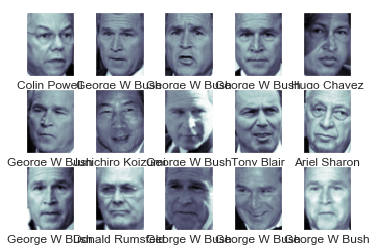

In [12]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = 'bone')
    axi.set(xticks=[], yticks=[],
           xlabel=faces.target_names[faces.target[i]])

In [14]:
from sklearn.svm import SVC
from sklearn.decomposition import RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [15]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=42)

In [16]:
from sklearn.grid_search import GridSearchCV

param_grid = {'svc__C': [1, 5, 10, 50],
             'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(X_train, y_train)
print(grid.best_params_)

Wall time: 23.8 s
{'svc__C': 5, 'svc__gamma': 0.001}


In [17]:
model = grid.best_estimator_
yfit = model.predict(X_test)

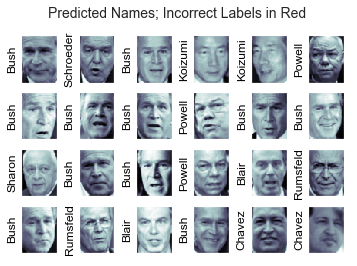

In [20]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.62      0.87      0.72        15
     Colin Powell       0.82      0.88      0.85        68
  Donald Rumsfeld       0.72      0.84      0.78        31
    George W Bush       0.98      0.80      0.88       126
Gerhard Schroeder       0.74      0.74      0.74        23
      Hugo Chavez       0.82      0.70      0.76        20
Junichiro Koizumi       0.80      1.00      0.89        12
       Tony Blair       0.82      0.95      0.88        42

      avg / total       0.86      0.84      0.84       337



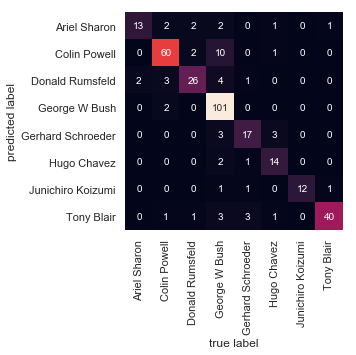

In [22]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');